In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime, timedelta
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
data = pd.read_csv('data/train_files/stock_prices_ad.csv', parse_dates=[2], index_col=0)
data.head()
data.shape

(2332531, 18)

In [3]:
features = ['RowId', 'Date', 'SecuritiesCode', 'ad_Open', 'ad_High', 'ad_Low', 'ad_Close', 'ad_Volume',
       'ad_Target']

In [4]:
data = data[features]
data.head()

,RowId,Date,SecuritiesCode,ad_Open,ad_High,ad_Low,ad_Close,ad_Volume,ad_Target
1483,20170104_8194,2017-01-04,8194,3325.0,3390.0,3300.0,3380.0,36100.0,-0.002963
3348,20170105_8194,2017-01-05,8194,3395.0,3420.0,3360.0,3375.0,19400.0,-0.020802
5213,20170106_8194,2017-01-06,8194,3365.0,3385.0,3335.0,3365.0,23000.0,-0.006070
7078,20170110_8194,2017-01-10,8194,3350.0,3360.0,3290.0,3295.0,42400.0,-0.022901
8943,20170111_8194,2017-01-11,8194,3330.0,3330.0,3260.0,3275.0,20200.0,0.054688


In [5]:
# function to calculate rate each day
def calculate_rank(data, day):
    # select one day
    df_ = data[(data['Date'] == day)]
    # compute the rank
    df_.loc[:, 'Rank'] = df_['ad_Target'].rank(ascending=False, method='first') - 1

    return df_

In [6]:
data_w_rank = pd.DataFrame(columns=features)
data_w_rank

,RowId,Date,SecuritiesCode,ad_Open,ad_High,ad_Low,ad_Close,ad_Volume,ad_Target


In [7]:
data_w_rank = pd.DataFrame(columns=features)

# calculate range for all days:
for day in tqdm(data.Date.unique()):

    ranking = calculate_rank(data[features], day)

    data_w_rank = pd.concat([data_w_rank, ranking], axis=0)

data_w_rank.to_csv('data/train_files/stock_prices_ad_rank.csv')
data_w_rank.head()


100%|██████████| 1202/1202 [02:38<00:00,  7.61it/s]


,RowId,Date,SecuritiesCode,ad_Open,ad_High,ad_Low,ad_Close,ad_Volume,ad_Target,Rank
1483,20170104_8194,2017-01-04 00:00:00,8194,3325.0,3390.0,3300.0,3380.0,36100.0,-0.002963,1166.0
1484,20170104_8198,2017-01-04 00:00:00,8198,1892.0,1902.0,1892.0,1902.0,11800.0,-0.001049,1053.0
1485,20170104_8200,2017-01-04 00:00:00,8200,2286.0,2308.0,2281.0,2298.0,163800.0,0.001305,862.0
1486,20170104_8202,2017-01-04 00:00:00,8202,731.0,755.0,722.0,754.0,790800.0,-0.020888,1756.0
1487,20170104_8203,2017-01-04 00:00:00,8203,415.0,424.0,414.0,423.0,30300.0,-0.004739,1255.0


In [8]:
def plot_stock(df, Code, feat='ad_Target'):
    df = df.query('SecuritiesCode==@Code')

    plt.figure(figsize=(20,5))

    sns.lineplot(data=df, y=feat, x='Date', color = 'red')



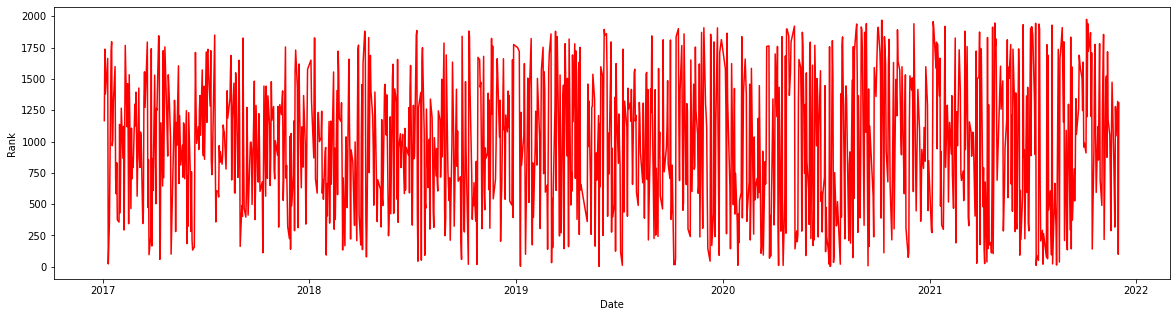

In [10]:
code = 8194
plot_stock(data_w_rank, code, 'Rank')


next : 

- train-, test- split (test = 56 days)
- used rank as predicted rank and calculate the score
- baseline model rolling mean?
